# Trabalho de Python

In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
from datetime import datetime

#### 1) Leia o arquivo lemonades.csv usando pandas

In [510]:
limonadas = pd.read_csv('./data/Lemonade2016(2).csv', sep=';')

In [511]:
limonadas.columns = ['Data', 'Local', 'Limao', 'Laranja', 'Temperatura', 'Folhetos', 'Preco']

In [512]:
# Convertendo para o formato de datetime
limonadas['Data'] = pd.to_datetime(limonadas['Data'], format='%m/%d/%Y')

In [513]:
limonadas.head()

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco
0,2016-07-01,Park,97,67,70,90.0,0.25
1,2016-07-02,Park,98,67,72,90.0,0.25
2,2016-07-03,Park,110,77,71,104.0,0.25
3,2016-07-04,Beach,134,99,76,98.0,0.25
4,2016-07-05,Beach,159,118,78,135.0,0.25


#### 2) retorne as informações sobre as colunas e as principais estatísticas sobre o dataset

In [514]:
limonadas.dtypes

Data           datetime64[ns]
Local                  object
Limao                   int64
Laranja                 int64
Temperatura             int64
Folhetos              float64
Preco                 float64
dtype: object

In [515]:
limonadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
Data           31 non-null datetime64[ns]
Local          32 non-null object
Limao          32 non-null int64
Laranja        32 non-null int64
Temperatura    32 non-null int64
Folhetos       31 non-null float64
Preco          32 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 1.8+ KB


In [516]:
limonadas.describe()

,Limao,Laranja,Temperatura,Folhetos,Preco
count,32.000000,32.000000,32.000000,31.000000,32.000000
mean,116.156250,80.000000,78.968750,108.548387,0.354687
std,25.823357,21.863211,4.067847,20.117718,0.113137
min,71.000000,42.000000,70.000000,68.000000,0.250000
25%,98.000000,66.750000,77.000000,90.000000,0.250000
50%,113.500000,76.500000,80.500000,108.000000,0.350000
75%,131.750000,95.000000,82.000000,124.000000,0.500000
max,176.000000,129.000000,84.000000,158.000000,0.500000


#### 3)Realize a limpeza do dataset: - verifique se existe valores nulos

In [517]:
limonadas.isna().sum()

Data           1
Local          0
Limao          0
Laranja        0
Temperatura    0
Folhetos       1
Preco          0
dtype: int64

##### - remova duplicatas

In [518]:
print('Valores duplicados:', limonadas.duplicated().sum())
limonadas[limonadas.duplicated()]

Valores duplicados: 1


,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco
6,2016-07-06,Beach,103,69,82,90.0,0.25


In [519]:
limonadas = limonadas.drop_duplicates()
limonadas[limonadas.duplicated()]

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco


##### - trate os elementos faltantes (interpolação e media)

In [520]:
limonadas['Folhetos'] = limonadas['Folhetos'].fillna(limonadas['Folhetos'].mean())

In [521]:
limonadas.isna().sum()

Data           1
Local          0
Limao          0
Laranja        0
Temperatura    0
Folhetos       0
Preco          0
dtype: int64

In [522]:
limonadas[limonadas['Data'].isna()]

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco
8,NaT,Beach,123,86,82,113.0,0.25


In [523]:
tmp = limonadas['Data'].apply(lambda t: (t-datetime(1970,1,1)).total_seconds())
tmp.interpolate(inplace=True) 
limonadas['Data'] = pd.to_datetime(tmp, unit='s') 
limonadas['Data'] = limonadas['Data'].apply(lambda t: t.date())
limonadas['Data'] = pd.to_datetime(limonadas['Data'], format='%Y-%m-%d')
limonadas.head(10)

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco
0,2016-07-01,Park,97,67,70,90.0,0.25
1,2016-07-02,Park,98,67,72,90.0,0.25
2,2016-07-03,Park,110,77,71,104.0,0.25
3,2016-07-04,Beach,134,99,76,98.0,0.25
4,2016-07-05,Beach,159,118,78,135.0,0.25
5,2016-07-06,Beach,103,69,82,90.0,0.25
7,2016-07-07,Beach,143,101,81,135.0,0.25
8,2016-07-08,Beach,123,86,82,113.0,0.25
9,2016-07-09,Beach,134,95,80,126.0,0.25
10,2016-07-10,Beach,140,98,82,131.0,0.25


#### 4) Adicione uma coluna chamada "Sales" que contém o total de vendas de limão e laranja 

In [524]:
limonadas['Sales'] = limonadas['Laranja'] + limonadas['Limao']
limonadas.head()

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco,Sales
0,2016-07-01,Park,97,67,70,90.0,0.25,164
1,2016-07-02,Park,98,67,72,90.0,0.25,165
2,2016-07-03,Park,110,77,71,104.0,0.25,187
3,2016-07-04,Beach,134,99,76,98.0,0.25,233
4,2016-07-05,Beach,159,118,78,135.0,0.25,277


#### 5) Adicione uma coluna chamada "Revenue" que calcula o lucro (venda*preço) 

In [525]:
limonadas['Revenue'] = limonadas['Sales'] * limonadas['Preco']
limonadas.head()

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco,Sales,Revenue
0,2016-07-01,Park,97,67,70,90.0,0.25,164,41.00
1,2016-07-02,Park,98,67,72,90.0,0.25,165,41.25
2,2016-07-03,Park,110,77,71,104.0,0.25,187,46.75
3,2016-07-04,Beach,134,99,76,98.0,0.25,233,58.25
4,2016-07-05,Beach,159,118,78,135.0,0.25,277,69.25


#### 6) retorne o lucro total 

In [526]:
limonadas['Revenue'].sum()

2138.0

#### 7) escreva uma função que receba dois parâmetros, dataset e temp(int). Se max for 1, ele retorna a máxima temperatura observada no conjunto de dados; se 0, retorna a média do período observado; se -1, retorna a temperatura mínima 


In [527]:
def obter_dados_temperatura(dataset, temp):
    temperatura = dataset['Temperatura']
    if temp == 1: return temperatura.max()
    elif temp == 0: return temperatura.mean()
    elif temp == -1: return temperatura.min()
    else: return 0    

In [528]:
print('Para 1:', obter_dados_temperatura(limonadas, 1))
print('Para 0:', obter_dados_temperatura(limonadas, 0))
print('Para -1:', obter_dados_temperatura(limonadas, -1))

Para 1: 84
Para 0: 78.87096774193549
Para -1: 70


#### 8) escreva uma função que receba dois parametros (dataset, localização) e retorne o dataset com o preço do limão e laranja ajustados em 15% se a localização for 'Park' ou ajustados em 10% se a localização for 'Beach' 

In [529]:
def obter_preco_ajustado(dataset, localizacao):
    novoDataSet = dataset[dataset['Local'] == localizacao].copy()
    if localizacao == 'Park':
        novoDataSet['Preco'] = novoDataSet['Preco'] + (novoDataSet['Preco'] * .15)
        return novoDataSet
    elif localizacao == 'Beach':
        novoDataSet['Preco'] = novoDataSet['Preco'] +  (novoDataSet['Preco'] * 0.1)
        return novoDataSet
    else: return novoDataSet

In [530]:
aux = obter_preco_ajustado(limonadas, 'Park')
aux[aux['Local'] == 'Park'].head()

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco,Sales,Revenue
0,2016-07-01,Park,97,67,70,90.0,0.2875,164,41.00
1,2016-07-02,Park,98,67,72,90.0,0.2875,165,41.25
2,2016-07-03,Park,110,77,71,104.0,0.2875,187,46.75
18,2016-07-18,Park,131,92,81,122.0,0.5750,223,111.50
19,2016-07-19,Park,122,85,78,113.0,0.5750,207,103.50


In [531]:
aux = obter_preco_ajustado(limonadas, 'Beach')
aux[aux['Local'] == 'Beach'].head()

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco,Sales,Revenue
3,2016-07-04,Beach,134,99,76,98.0,0.275,233,58.25
4,2016-07-05,Beach,159,118,78,135.0,0.275,277,69.25
5,2016-07-06,Beach,103,69,82,90.0,0.275,172,43.00
7,2016-07-07,Beach,143,101,81,135.0,0.275,244,61.00
8,2016-07-08,Beach,123,86,82,113.0,0.275,209,52.25


#### 9) escreva uma função que receba o dataset como parâmetro e retorne o dataset com uma coluna a mais que mostre o rank de temperatura. O dataset retornado precisa estar ordenado de acordo com rank 

In [532]:
def obter_rank_temperatura(dataset, campo):
    dataset['Rank'] = dataset[campo].rank(ascending = 0)
    return dataset.sort_values(by=['Rank']);

In [533]:
limonadas = obter_rank_temperatura(limonadas, 'Temperatura')
limonadas.head()

,Data,Local,Limao,Laranja,Temperatura,Folhetos,Preco,Sales,Revenue,Rank
25,2016-07-25,Park,156,113,84,135.0,0.50,269,134.50,1.5
12,2016-07-12,Beach,130,95,84,99.0,0.25,225,56.25,1.5
26,2016-07-26,Park,176,129,83,158.0,0.35,305,106.75,3.5
11,2016-07-11,Beach,162,120,83,135.0,0.25,282,70.50,3.5
24,2016-07-24,Park,121,82,82,117.0,0.50,203,101.50,8.0


#### 10) Imprima um gráfico de linha que retorne o lucro ao longo do tempo 

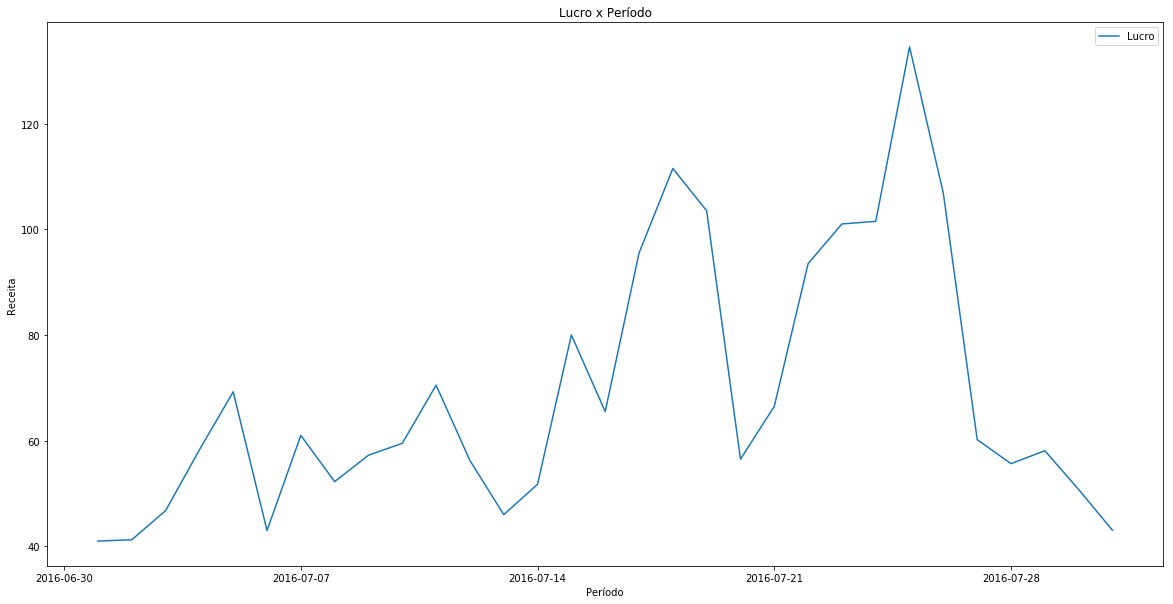

In [545]:
limonadas = limonadas.sort_values(by='Data')
plt.plot(limonadas['Data'], limonadas['Revenue'], label='Lucro')

plt.xlabel('Período')
plt.ylabel('Receita')
plt.title("Lucro x Período")
plt.rcParams["figure.figsize"] = [20,10]
plt.legend()
plt.show()

#### 11) crie um scatter-plot leaflets x sales. Existe alguma correlação entre os dados? 

Text(0.5,1,'Comparação Folhetos x Vendas')

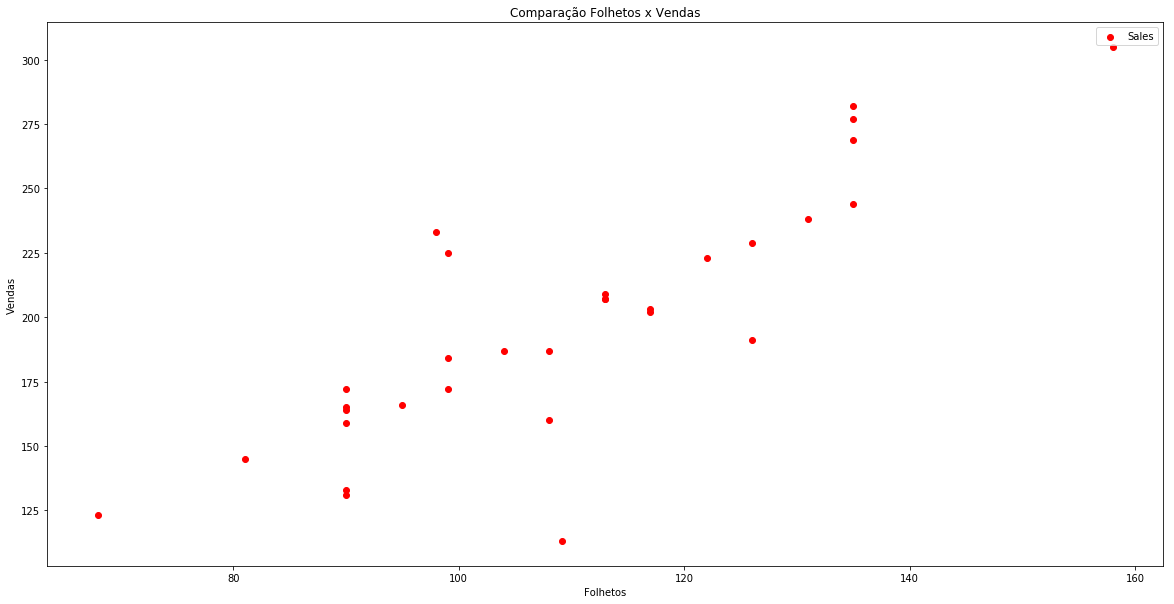

In [547]:


plt.scatter(limonadas['Folhetos'], limonadas['Sales'], color='r')
plt.legend()
plt.xlabel("Folhetos")
plt.ylabel("Vendas")
plt.title("Comparação Folhetos x Vendas")

#### 12) crie um histograma que mostre o lucro (revenue) com 10 bins

In [551]:
def obter_histograma(atributo, dados, titulo, bins):
    plt.hist(dados[atributo], density=False, facecolor='g', alpha=0.75, bins=bins)

    plt.axvline(dados[atributo].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.xlabel(titulo)
    plt.ylabel(atributo)
    plt.title('Histograma de ' + atributo)
    plt.grid(True)
    plt.show()

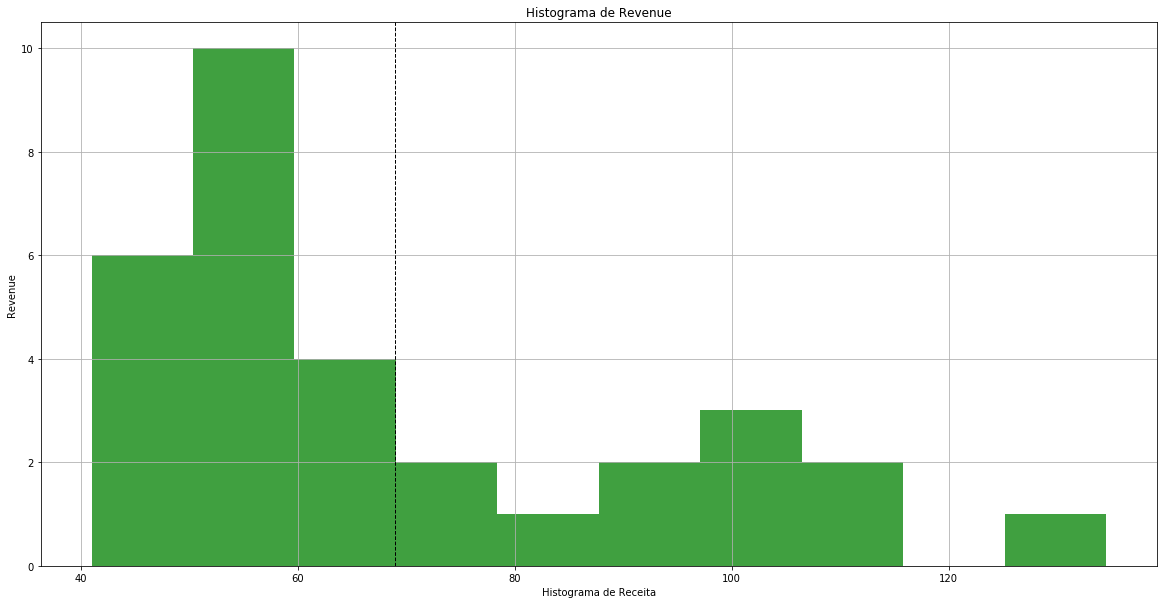

In [552]:
obter_histograma('Revenue', limonadas, 'Histograma de Receita', 10)

#### 13) crie um gráfico de linha que compute o lucro por tipo de fruta ao longo do tempo